In [4]:
import numpy as np
print(np.__version__)

2.3.1


Shock forms first for u = 0.2500 at time t = -38.0662


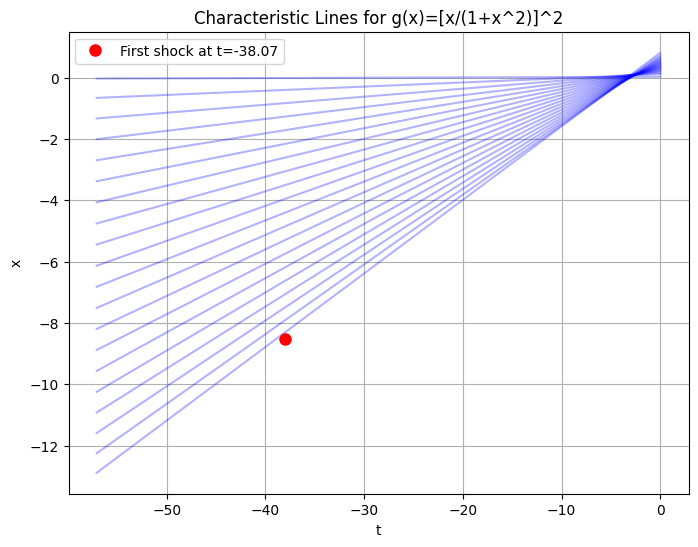

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the initial condition g(x) for x >= 0
def g(x):
    return (x/(1+x**2))**2

# Numerically compute the inverse function g^{-1}(u)
def g_inv(u):
    # Solve g(x) - u = 0 for x, starting with an initial guess
    sol = fsolve(lambda x: g(x) - u, np.sqrt(u) if u > 0 else 0.1)
    return sol[0]

# Create an array of u values within the range of g (0 to 1/4)
u_vals = np.linspace(0.001, 0.25, 100)
# Compute g^{-1}(u) for these u values
x0_vals = np.array([g_inv(u) for u in u_vals])

# Compute the derivative (g^{-1})'(u) using finite differences
dg_inv_du = np.gradient(x0_vals, u_vals)

# Compute the shock time for each u (with f''(u)=1)
t_vals = -dg_inv_du

# Identify the minimum shock time and corresponding u (inflection point of g^{-1})
min_index = np.argmin(t_vals)
t_shock = t_vals[min_index]
u_inflection = u_vals[min_index]
x_inflection = x0_vals[min_index]

print(f"Shock forms first for u = {u_inflection:.4f} at time t = {t_shock:.4f}")

# Plot characteristic lines: x = u*t + g^{-1}(u)
t = np.linspace(0, t_shock*1.5, 200)
plt.figure(figsize=(8,6))
for u in u_vals[::5]:  # Plot a subset for clarity
    x0 = g_inv(u)
    x = u*t + x0
    plt.plot(t, x, 'b-', alpha=0.3)

# Mark the envelope point
plt.plot(t_shock, u_inflection*t_shock + g_inv(u_inflection), 'ro', markersize=8,
         label=f'First shock at t={t_shock:.2f}')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Characteristic Lines for g(x)=[x/(1+x^2)]^2')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import plotly.graph_objects as go

# Define a grid for plotting
x_vals = np.linspace(-2, 2, 30)
y_vals = np.linspace(-1, 4, 30)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
F_surface = y_mesh - x_mesh**2  # Compute F(x, y)

# Create a 3D interactive surface plot
fig = go.Figure()

# Add surface plot for F(x, y)
fig.add_trace(go.Surface(z=F_surface, x=x_mesh, y=y_mesh, colorscale="Viridis", opacity=0.7))

# Add the curve y = x^2 in 3D with F = 0
x_curve = np.linspace(-2, 2, 100)
y_curve = x_curve**2
F_curve = np.zeros_like(x_curve)  # Since F = 0 along the curve

fig.add_trace(go.Scatter3d(
    x=x_curve, y=y_curve, z=F_curve,
    mode='lines', line=dict(color='red', width=5),
    name="Curve: y = x^2"
))

# Labels and layout
fig.update_layout(
    title="Interactive View of Surface F(x, y) = y - x²",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="F(x, y)"),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show interactive plot
fig.show()

In [7]:
import plotly
print(plotly.__version__)

6.1.2


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import poch, factorial

def hypergeom_2F1(a, b, c, z, nterms):
    """Compute _2F_1(a, b; c; z) as a sum of nterms of its series expansion."""
    s = np.zeros_like(z, dtype=float)
    for k in range(nterms):
        term = poch(a, k) * poch(b, k) / (poch(c, k) * factorial(k)) * (z**k)
        s += term
    return s

# Define x in the open interval (-1,1)
x = np.linspace(-0.99, 0.99, 400)
z = (1 - x) / 2.0  # our series variable

plt.figure(figsize=(8,6))

# Plot partial sums for different numbers of terms
for nterms in [5, 10, 20, 40]:
    P_series = hypergeom_2F1(-0.5, 1.5, 1.0, z, nterms)
    plt.plot(x, P_series, label=f'{nterms} terms')

plt.xlabel('x')
plt.ylabel(r'$P_{1/2}(x)$')
plt.title(r'Partial sums for $P_{1/2}(x)=\,_2F_1\Bigl(-\tfrac12,\tfrac32;1;\frac{1-x}{2}\Bigr)$')
plt.legend()
plt.grid(True)
plt.show()

ValueError: 
P_{1/2}(x)=\,_2F_1\Bigl(-\tfrac12,\tfrac32;1;\frac{1-x}{2}\Bigr)
                  ^
ParseFatalException: Unknown symbol: \Bigl, found '\'  (at char 18), (line:1, col:19)

<Figure size 800x600 with 1 Axes>